## 오늘 배울 것들

- 지난 시간 Pandas 복습
- random 패키지 이용하여 샘플 데이터 만들기
- Pandas 조금 더 (sort_values, dupliacated, dropna)
- matplotlib으로 라인 차트 그리기, 실제 강수량 데이터 가져와서 라인 차트 그리고 꾸며보기

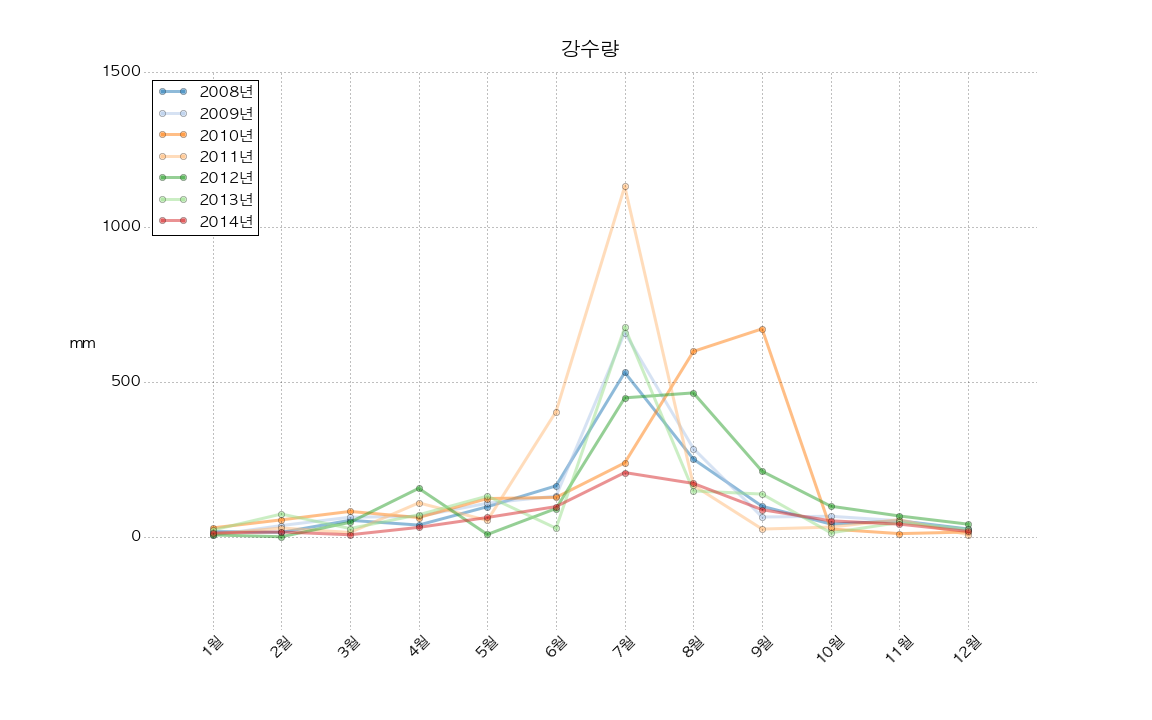

In [136]:
from IPython.display import Image
Image(filename='rainfall.png')

## 6주차 Pandas 복습

지난 시간 크롤링으로 긁어온 영화 데이터들을 가지고, 아래의 일들을 해봅시다. 크롤링 못하신 분들은 [링크](https://www.dropbox.com/s/xymrqvo34qbd2mr/movie_from_df.csv?dl=1)에서 다운 받아서 사용해주세요.


1. score를 0~50, 50~70, 70~90, 90~100 range로 나누고, comment 컬럼에 bad, so so, good, fantastic을 넣어봅시다. 
2. 그래프로 그려봅시다.
3. drama 장르인 영화들을 뽑아봅시다.
4. Comedy이면서 러닝타임이 120분 이상인 것들을 골라봅시다.
5. 러닝 타임이 120분 이상인 평가가 good인 Comedy를 골라봅시다.

In [47]:
# 크롤링한 데이터를 받아옵니다.
import pandas as pd
movie_df = pd.read_csv('./movie_from_df.csv')
movie_df.head()

,title,scorr,genre,running time,actors
0,The Woman in Black 2: Angel of Death (2014),42,Drama/Horror/Thriller,98 min,Helen McCrory/Jeremy Irvine/Phoebe Fox/Leanne ...
1,A Most Violent Year (2014),79,Action/Crime/Drama/Thriller,125 min,Oscar Isaac/Jessica Chastain/David Oyelowo/Ale...
2,Leviafan (2014),92,Drama,140 min,Aleksey Serebryakov/Elena Lyadova/Roman Madyan...
3,[REC] 4: Apocalipsis (2014),53,Action/Horror/Thriller,95 min,Manuela Velasco/Paco Manzanedo/Héctor Colomé/I...
4,The Search for General Tso (2014),72,Documentary/Comedy/History/Mystery,71 min,Ian Cheney


In [48]:
# 저장이 scorr로 되어있어서, score로 바꾸겠습니다.
movie_df.rename(columns={'scorr':'score'}, inplace=True)

In [49]:
# row 선택 방법입니다.
movie_df.ix[2]

# column 선택 방법입니다.
movie_df['score'].head()

0    42
1    79
2    92
3    53
4    72
Name: score, dtype: float64

In [50]:
# 1. apply를 사용해서 해결할 수 있습니다.
def return_score_label(score):
    if score > 90:
        return 'fantastic'
    elif score > 70:
        return 'good'
    elif score > 50:
        return 'so so'
    elif score <= 50:
        return 'bad'
    else:
        # nan으로 들어간 경우도 있습니다. (not a number)
        return 'not supported'
    
movie_df['score_label'] = movie_df['score'].apply(return_score_label)

In [51]:
movie_df.head()

,title,score,genre,running time,actors,score_label
0,The Woman in Black 2: Angel of Death (2014),42,Drama/Horror/Thriller,98 min,Helen McCrory/Jeremy Irvine/Phoebe Fox/Leanne ...,bad
1,A Most Violent Year (2014),79,Action/Crime/Drama/Thriller,125 min,Oscar Isaac/Jessica Chastain/David Oyelowo/Ale...,good
2,Leviafan (2014),92,Drama,140 min,Aleksey Serebryakov/Elena Lyadova/Roman Madyan...,fantastic
3,[REC] 4: Apocalipsis (2014),53,Action/Horror/Thriller,95 min,Manuela Velasco/Paco Manzanedo/Héctor Colomé/I...,so so
4,The Search for General Tso (2014),72,Documentary/Comedy/History/Mystery,71 min,Ian Cheney,good


In [52]:
# 2. same value들을 count하고, 그래프 그리는 것을 배웠습니다.
movie_df['score_label'].value_counts()

so so            148
bad              122
good              96
not supported     16
fantastic          7
Name: score_label, dtype: int64

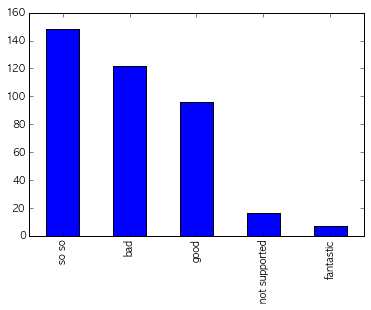

In [53]:
movie_df['score_label'].value_counts().plot(kind='bar')

In [54]:
# 3. 조금 어려울 수 있는데, apply를 사용해서 해결 할 수 있습니다.
def check_contain(genre):
    if 'Drama' in genre:
        return True
    else:
        return False
    
movie_df['genre'].apply(check_contain).head()

0     True
1     True
2     True
3    False
4    False
Name: genre, dtype: bool

In [55]:
# Drama를 genre만 가져왔습니다.
movie_df[movie_df['genre'].apply(check_contain)].head()

,title,score,genre,running time,actors,score_label
0,The Woman in Black 2: Angel of Death (2014),42,Drama/Horror/Thriller,98 min,Helen McCrory/Jeremy Irvine/Phoebe Fox/Leanne ...,bad
1,A Most Violent Year (2014),79,Action/Crime/Drama/Thriller,125 min,Oscar Isaac/Jessica Chastain/David Oyelowo/Ale...,good
2,Leviafan (2014),92,Drama,140 min,Aleksey Serebryakov/Elena Lyadova/Roman Madyan...,fantastic
6,Die geliebten Schwestern (2014),66,Drama/History/Romance,138 min,Hannah Herzsprung/Florian Stetter/Henriette Co...,so so
7,Boven is het stil (2013),72,Drama,93 min,Jeroen Willems/Henri Garcin/Wim Opbrouck/Marti...,good


In [56]:
# Drama를 argument로 넘기고 싶으면, 이와 같이 하면 됩니다.
def check_contain(genre, target):
    if target in genre:
        return True
    else:
        return False
    
movie_df['genre'].apply(check_contain, args=('Drama',)).head()

0     True
1     True
2     True
3    False
4    False
Name: genre, dtype: bool

In [57]:
# args=('Drama', )를 찍어준 이유는 args가 tuple 자료구조임을 알려주기 위해서입니다.
a = (1,)
type(a)

tuple

In [58]:
b=(2)
type(b)

int

In [59]:
# 지난 시간에 안 배운 내용 중에, 특정 string을 포함하고 있는지 확인하는 방법입니다.
movie_df['genre'].str.contains("Drama").head()

0     True
1     True
2     True
3    False
4    False
Name: genre, dtype: bool

In [60]:
# 이렇게!
movie_df[movie_df['genre'].str.contains("Drama")].head()

,title,score,genre,running time,actors,score_label
0,The Woman in Black 2: Angel of Death (2014),42,Drama/Horror/Thriller,98 min,Helen McCrory/Jeremy Irvine/Phoebe Fox/Leanne ...,bad
1,A Most Violent Year (2014),79,Action/Crime/Drama/Thriller,125 min,Oscar Isaac/Jessica Chastain/David Oyelowo/Ale...,good
2,Leviafan (2014),92,Drama,140 min,Aleksey Serebryakov/Elena Lyadova/Roman Madyan...,fantastic
6,Die geliebten Schwestern (2014),66,Drama/History/Romance,138 min,Hannah Herzsprung/Florian Stetter/Henriette Co...,so so
7,Boven is het stil (2013),72,Drama,93 min,Jeroen Willems/Henri Garcin/Wim Opbrouck/Marti...,good


In [61]:
# 4. apply를 사용해 min을 떼어내고 비교합시다.
def detach_min(running_time):
    rt = running_time.split('min')[0].strip()
    return int(rt)

# and 조건은 &로, or 조건은 |로 합니다. 연산자 우선 순위를 지켜주기 위해 (괄호)를 잊지마세요! 
movie_df[(movie_df['genre'].str.contains('Drama')) & \
         (movie_df['running time'].apply(detach_min)>120) ].head()

,title,score,genre,running time,actors,score_label
1,A Most Violent Year (2014),79,Action/Crime/Drama/Thriller,125 min,Oscar Isaac/Jessica Chastain/David Oyelowo/Ale...,good
2,Leviafan (2014),92,Drama,140 min,Aleksey Serebryakov/Elena Lyadova/Roman Madyan...,fantastic
6,Die geliebten Schwestern (2014),66,Drama/History/Romance,138 min,Hannah Herzsprung/Florian Stetter/Henriette Co...,so so
10,Blackhat (2015),51,Action/Crime/Drama/Mystery/Thriller,133 min,Chris Hemsworth/Viola Davis/Wei Tang/Leehom Wang,so so
22,Mommy (2014),74,Drama,139 min,Anne Dorval/Antoine-Olivier Pilon/Suzanne Clém...,good


In [64]:
# 5. 러닝 타임이 120분 이상인 평가가 good인 Comedy를 골라봅시다.

In [65]:
# movie_df[...]

## random 패키지를 사용하여 샘플 데이터를 생성하는 방법

random패키지를 사용하면 샘플 데이터(숫자)를 만들 때 아주 편리합니다.

In [73]:
import random

### random.sample

In [74]:
# [1,2,3,4,5] 중에 2개를 뽑아줘
random.sample([1,2,3,4,5],2)

[4, 1]

In [75]:
# get_random_number(start, end, how_many)라는 함수를 만들고 
# 데이터 샘플링에 활용해봅시다. range를 사용하였기 때문에 중복은 없습니다.
def get_sample_numbers(start, end, how_many):
    return random.sample(range(start, end), how_many)

### random.randint

In [76]:
# 10부터 20까지 숫자중 랜덤으로 하나 뽑아주세요
random.randint(10,20)

17

In [77]:
# how_many 만큼 start, end 범위에 있는 숫자들을 중복하여 추출합니다.
def get_random_numbers(start, end, how_many):
    return [random.randint(start, end) for i in range(how_many)]

In [78]:
get_random_numbers(0,10,10)

[8, 0, 3, 0, 7, 3, 10, 9, 5, 7]

In [79]:
# DataFrame을 만들어봅시다.
df = DataFrame({
    '이름': ['나은', '성필', '원경', '지연', '수'],
    '나이': get_random_numbers(1,100,5)
}, columns = ['이름', '나이'])
df

,이름,나이
0,나은,98
1,성필,68
2,원경,14
3,지연,52
4,수,56


### 해보기

아래와 같은 데이터 포맷으로 get_sample_numbers나 get_random_numbers을 사용하여, DataFrame을 만들어보세요

```
data = {
    '연도': [],
    '강수량': get_random_numbers(...)
}
```

### 정렬된 알파벳을 추출합니다.

In [80]:
import string
def get_alphabet(count):
    # [A, B, C, ... , AA, BB, ...] 을 담을 그릇입니다.
    str_list = []
    
    # A 하나쓸지 AA 두개쓸지 정하는 변수입니다.
    char_count = 1
    for i in range(count):
        if  i!=0 and i%len(string.ascii_lowercase)==0:
            char_count += 1
        str_list.append(string.ascii_uppercase[i%26]*char_count)
    
    return str_list

In [81]:
get_alphabet(100)[20:30]

['U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'BB', 'CC', 'DD']

## DataFrame에 대해 몇가지 더 알아봅시다.

### sort_values

In [82]:
# 샘플 데이터를 만들어봅시다.
df = DataFrame({
        'title': get_alphabet(10),
        'score': get_random_numbers(1,10,10)
    }, columns=['title','score'])

In [83]:
df

,title,score
0,A,2
1,B,3
2,C,10
3,D,1
4,E,5
5,F,4
6,G,1
7,H,4
8,I,7
9,J,5


In [84]:
# 기본적으로 오름차순 정렬입니다.
df.sort_values(by='score')

,title,score
3,D,1
6,G,1
0,A,2
1,B,3
5,F,4
7,H,4
4,E,5
9,J,5
8,I,7
2,C,10


In [85]:
# ascending=False 옵션을 주면 내림차순됩니다.
df.sort_values(by='score', ascending=False)

,title,score
2,C,10
8,I,7
4,E,5
9,J,5
5,F,4
7,H,4
1,B,3
0,A,2
3,D,1
6,G,1


In [86]:
# 샘플 데이터를 만들어봅시다.
df = DataFrame({
        'title': get_alphabet(50),
        'score1': get_random_numbers(1,10,50),
        'score2': get_random_numbers(1,10,50)
    }, columns=['title','score1','score2'])
df.head()

,title,score1,score2
0,A,10,2
1,B,4,1
2,C,7,8
3,D,2,1
4,E,6,7


In [87]:
# 기본 오름, 오름 차순입니다.
df.sort_values(by=['score1','score2']).head()

,title,score1,score2
44,SS,1,1
23,X,1,2
43,RR,1,2
15,P,1,3
45,TT,1,8


In [88]:
df.sort_values(by=['score1','score2'],ascending=[False, True]).head()

,title,score1,score2
0,A,10,2
41,PP,10,3
11,L,10,4
47,VV,10,4
46,UU,10,5


### 해보기

1. movie_df를 가지고 score 내림차순 정리를 해봅시다.

In [89]:
# movie_df.sort_values(..)

2. score, running time으로 내림차순 정리 해봅시다. running time에는 'min'이라는 문자열이 붙어있으니, 일단 그것부터 없애줍시다.

In [90]:
# movie_df['..'] = movie_df['..'].apply(..)
# movie_df.sort_values(..)

### dropna

score가 nan인 row들이 있었습니다.

In [91]:
# score만 373개의 non-null이고, 나머지는 389 입니다.
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 388
Data columns (total 6 columns):
title           389 non-null object
score           373 non-null float64
genre           389 non-null object
running time    389 non-null object
actors          389 non-null object
score_label     389 non-null object
dtypes: float64(1), object(5)
memory usage: 21.3+ KB


In [92]:
# score가 nan인 row들을 모두 버렸습니다.
movie_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 388
Data columns (total 6 columns):
title           373 non-null object
score           373 non-null float64
genre           373 non-null object
running time    373 non-null object
actors          373 non-null object
score_label     373 non-null object
dtypes: float64(1), object(5)
memory usage: 20.4+ KB


In [93]:
pd.isnull(movie_df['score']).head()

0    False
1    False
2    False
3    False
4    False
Name: score, dtype: bool

In [94]:
# nan row들 확인하기
movie_df[pd.isnull(movie_df['score'])].head()

,title,score,genre,running time,actors,score_label
45,Gloria (2014),NaN,Biography/Drama/Music,126 min,Sofía Espinosa/Marco Pérez/Tatiana del Real/Ka...,not supported
51,A la mala (2015),NaN,Comedy,99 min,Aislinn Derbez/Mauricio Ochmann/Aurora Papile/...,not supported
59,Compared to What: The Improbable Journey of Ba...,NaN,Documentary/Biography/Drama,87 min,Barney Frank/Spencer Bachus/Mike Barnicle/Neil...,not supported
142,Chocolate City (2015),NaN,Drama,91 min,Robert Ri'chard/Tyson Beckford/DeRay Davis/Viv...,not supported
195,Nowitzki: Der perfekte Wurf (2014),NaN,Documentary/Biography/Sport,105 min,Dirk Nowitzki/Holger Geschwindner/Kobe Bryant/...,not supported


### duplicated

DataFrame에 중복되는 데이터(같은 row)가 있을때, 중복 데이터들을 drop하기 위해 사용합니다.

In [95]:
df = DataFrame({
        'x': ['A']*5 + ['B']*5,
        'y': get_random_numbers(1,3,10)
})
df

,x,y
0,A,1
1,A,1
2,A,2
3,A,3
4,A,1
5,B,2
6,B,1
7,B,1
8,B,2
9,B,1


In [96]:
df.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

In [97]:
df.drop_duplicates()

,x,y
0,A,1
2,A,2
3,A,3
5,B,2
6,B,1


In [98]:
# x columns에서 중복된 녀석들 모두 제외 (기본적으로는 모든 columns 기준입니다. 
# 즉, 위의 경우 ['x','y']가 들어가 있는 것이죠.)
df.drop_duplicates(['x'])

,x,y
0,A,1
5,B,2


In [99]:
# y column에서 중복된 녀석들 모두 제외 (default로 맨 위 값을 고릅니다.)
df.drop_duplicates(['y'])

,x,y
0,A,1
2,A,2
3,A,3


In [100]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html

# keep에는 first, last, False 옵션이 들어갈 수 있습니다.
df.drop_duplicates(['y'], keep='last')

,x,y
3,A,3
8,B,2
9,B,1


## 데이터 시각화

이제 matplotlib 패키지를 사용하여, 데이터를 시각화하는 방법에 대해 배워보겠습니다. pyplot은 matplotlib 패키지의 코어 모듈로 plotting framework을 제공합니다. 

- [pyplot 문서](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
- [실제 matplotlib.pyplot 소스코드](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/pyplot.py)

In [101]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# matplotlib의 pyplot은 plotting framework을 제공합니다.
import matplotlib.pyplot as plt
%matplotlib inline

### 라인 차트 그리기

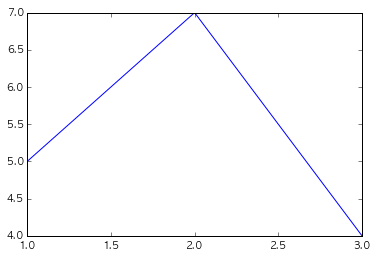

In [102]:
# 가장 기본적인 라인 차트를 그려보겠습니다.
x = [1,2,3]
y = [5,7,4]

plt.plot(x,y)

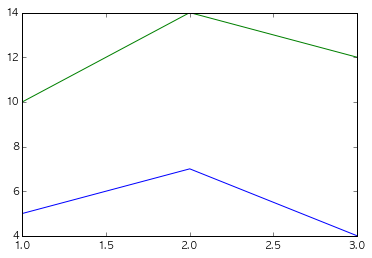

In [103]:
# 여러개의 라인을 한꺼번에 그릴 수도 있습니다. 
# iPython에서는 Cell 단위로 랜더링을 한번에 해서, plt.show() 합니다.
x = [1,2,3]
y = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x,y)
plt.plot(x2,y2)

# plt.show() # pyCharm에서 보고 싶으면 plt.show() 명령어가 필요합니다.

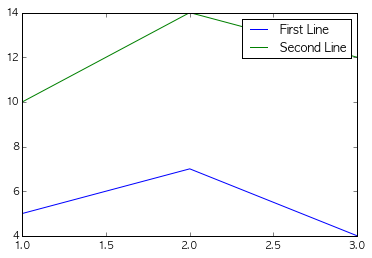

In [104]:
# 라인에 이름을 붙일 수 있습니다.
# 한글을 적으려면 
# 1. u"한글"
# 2. "한글".decode('utf-8')
# 3. matplotlib.rc('font', family='AppleGothic') # for 맥사용자
plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.legend()

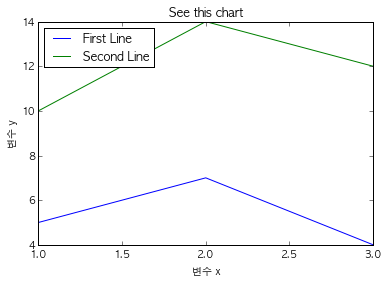

In [105]:
plt.plot(x,y,label='First Line')
plt.plot(x2,y2,label='Second Line')

# 축의 이름을 정하거나
plt.xlabel(u"변수 x")
plt.ylabel(u"변수 y")

# 차트의 제목을 정할 수 있습니다.
plt.title("See this chart")

# default는 오른쪽 위고, 위치를 지정할 수 있습니다.
plt.legend(loc='upper left')

# 	right
# 	center left
# 	upper right
# 	lower right
# 	best
# 	center
# 	lower left
# 	center right
# 	upper left
# 	upper center
# 	lower center

### 해보기

```
line 1
- x: 1~12 
- y: get_random_numbers(...)

line 2
- x: 1~12
- y: get_random_numbers(...)

title: Criminals
line 1 label: Seoul
line 2 label: Pusan
xlabel: Month
ylabel: Number of Criminals
legend: 오른쪽 아래
```

In [275]:
# x1 = ...
# y1 = ...

# x2 = ...
# y2 = ...

# plt.plot(..)
# plt.plot(..)

# plt.title(..)
# plt.xlabel(..)
# plt.ylabel(..)
# plt.legend()

### 2015, 2016 강수량 랜덤 데이터를 생성해봅시다.

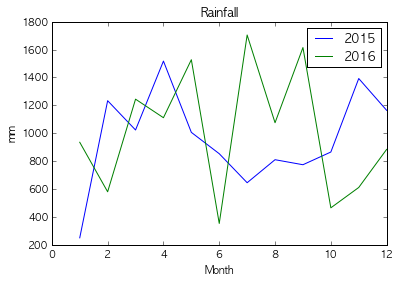

In [106]:
x = range(1,13)
y1 = get_random_numbers(0,1800,12)
y2 = get_random_numbers(0,1800,12)

plt.plot(x,y1,label='2015')
plt.plot(x,y2,label='2016')

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend()

### x,y 축 범위 지정 및 이미지 저장

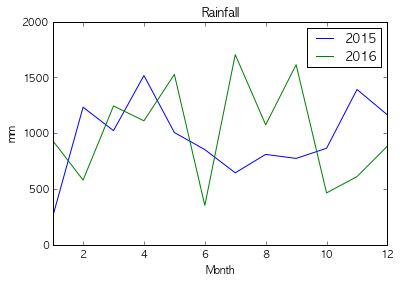

In [113]:
plt.plot(x,y1,label='2015')
plt.plot(x,y2,label='2016')

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend()

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,2000])

# savefig 합니다.
plt.savefig('rainfall1.png')

### plot 색깔 및 속성 지정

(0, 2000)

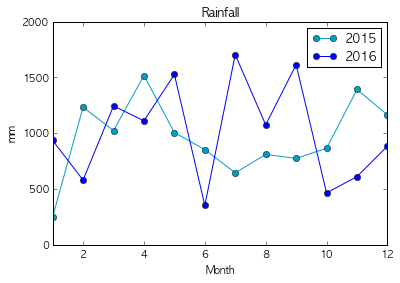

In [114]:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
plt.plot(x,y1,'ro-',label='2015', color='#00a0c6')
plt.plot(x,y2,'bo-',label='2016')

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend()

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,2000])

# plt.axis로도 가능합니다.
# plt.axis((1,12,0,2000))

### x tick을 정해줍니다.

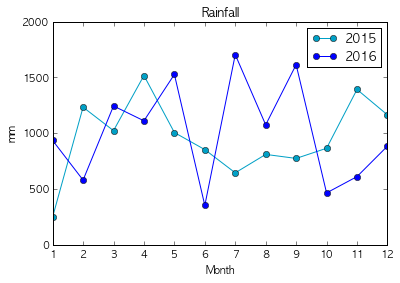

In [115]:
plt.plot(x,y1,'ro-',label='2015', color='#00a0c6')
plt.plot(x,y2,'bo-',label='2016')

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend()

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,2000])

# x tick을 정합니다.
plt.xticks(x)

# 다른 출력 결과를 보고 싶지 않으면 plt.show()하시면 됩니다.
plt.show()

### margin 조절

In [116]:
# 마이너스 부호(-)가 plot안에서 깨지는 경우가 있는데 아래와 같이 설정해주면 됩니다.
matplotlib.rcParams['axes.unicode_minus'] = False

(0.0, 13.0, -300.0, 2300.0)

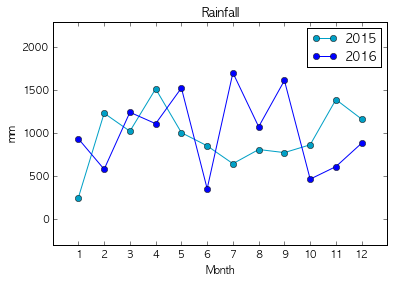

In [117]:
plt.plot(x,y1,'ro-',label='2015', color='#00a0c6')
plt.plot(x,y2,'bo-',label='2016')

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend()

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,2000])

# x tick을 정합니다.
plt.xticks(x)

# margin을 정해줍니다.
plot_x_margin = 1
plot_y_margin = 300
xl, xr, yl, yr = plt.axis()
plt.axis((xl - plot_x_margin,
          xr + plot_x_margin,
          yl - plot_y_margin,
          yr + plot_y_margin))

### axes 라인(spines) 지우기

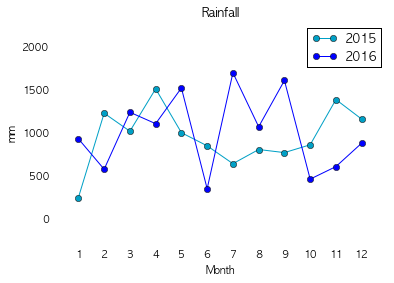

In [118]:
plt.plot(x,y1,'ro-',label='2015', color='#00a0c6')
plt.plot(x,y2,'bo-',label='2016')

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend()

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,2000])

# x tick을 정합니다.
plt.xticks(x)

# margin을 정해줍니다.
plot_x_margin = 1
plot_y_margin = 300
xl, xr, yl, yr = plt.axis()
plt.axis((xl - plot_x_margin,
          xr + plot_x_margin,
          yl - plot_y_margin,
          yr + plot_y_margin))

# spine 지우기
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# tick 지우기
plt.tick_params(bottom="off", top="off", left="off", right="off",
                labelbottom="on", labelleft="on")

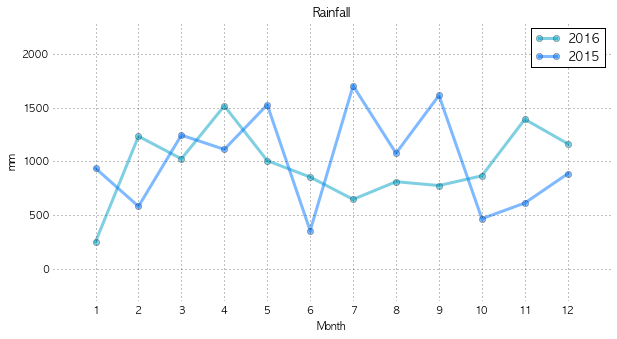

In [120]:
# figure size => (w,h) in inch
plt.figure(figsize=(10,5))

# 색깔 및 다른 속성들도 조금 더 바꿔보죠.
plt.plot(x,y1,'ro-',label='2015', color='#00a0c6', linewidth=3, alpha=0.5)
plt.plot(x,y2,'bo-',label='2016', color='#0075ff', linewidth=3, alpha=0.5)

plt.title('Rainfall')
plt.xlabel('Month')
plt.ylabel('mm')
plt.legend(['2016','2015'])

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,2000])

# x tick을 정합니다.
plt.xticks(x)

# margin을 정해줍니다.
plot_x_margin = 1
plot_y_margin = 300
xl, xr, yl, yr = plt.axis()
plt.axis((xl - plot_x_margin,
          xr + plot_x_margin,
          yl - plot_y_margin,
          yr + plot_y_margin))

# spine 지우기
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# grid 보여주기
plt.grid()

# tick 지우기
plt.tick_params(bottom="off", top="off", left="off", right="off",
                labelbottom="on", labelleft="on")

### figure, subplot 이해하기

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot

[]
[1]
[1]
[1, 2]
[1, 2]


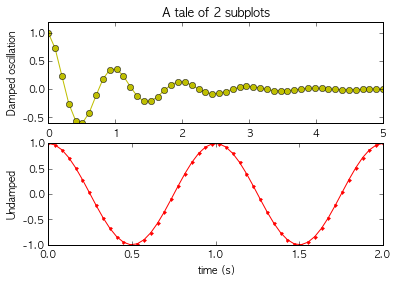

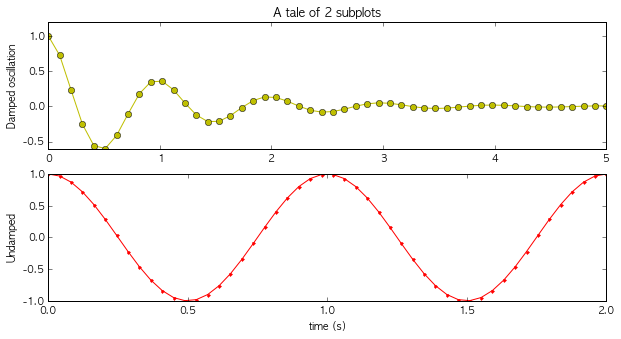

In [121]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

print plt.get_fignums()

plt.subplot(2, 1, 1)
print plt.get_fignums()

plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
print plt.get_fignums()

plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

# 새로운 figure를 추가합니다.
plt.figure(figsize=(10,5))

plt.subplot(2, 1, 1)
print plt.get_fignums()

plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
print plt.get_fignums()

plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

### 날씨 데이터 받아서 라인 차트 만들기

In [122]:
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# http://data.seoul.go.kr/openinf/linkview.jsp?infId=OA-11782
# data를 받아옵니다.
rain_df = pd.read_excel('./data/OctagonExcel.xls')

In [123]:
rain_df

,기간,구분,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,강수량,1356.3,17.7,15.0,53.9,38.5,97.7,165.0,530.8,251.2,99.2,41.8,52.4,25.9
1,2009,강수량,1564.0,5.7,36.9,63.9,66.5,109.0,132.0,659.4,285.3,64.5,66.9,52.4,21.5
2,2010,강수량,2043.5,29.3,55.3,82.5,62.8,124.0,127.6,239.2,598.7,671.5,25.6,10.9,16.1
3,2011,강수량,2039.3,8.9,29.1,14.6,110.1,53.4,404.5,1131.0,166.8,25.6,32.0,56.2,7.1
4,2012,강수량,1646.3,6.7,0.8,47.4,157.0,8.2,91.9,448.9,464.9,212.0,99.3,67.8,41.4
5,2013,강수량,1403.8,22.1,74.1,27.3,71.7,132.0,28.3,676.2,148.6,138.5,13.5,46.8,24.7
6,2014,강수량,808.9,13.0,16.2,7.2,31.0,63.0,98.1,207.9,172.8,88.1,52.2,41.5,17.9
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# nan인 row는 버립니다.
rain_df.dropna(inplace=True)

In [125]:
rain_df

,기간,구분,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2008,강수량,1356.3,17.7,15.0,53.9,38.5,97.7,165.0,530.8,251.2,99.2,41.8,52.4,25.9
1,2009,강수량,1564.0,5.7,36.9,63.9,66.5,109.0,132.0,659.4,285.3,64.5,66.9,52.4,21.5
2,2010,강수량,2043.5,29.3,55.3,82.5,62.8,124.0,127.6,239.2,598.7,671.5,25.6,10.9,16.1
3,2011,강수량,2039.3,8.9,29.1,14.6,110.1,53.4,404.5,1131.0,166.8,25.6,32.0,56.2,7.1
4,2012,강수량,1646.3,6.7,0.8,47.4,157.0,8.2,91.9,448.9,464.9,212.0,99.3,67.8,41.4
5,2013,강수량,1403.8,22.1,74.1,27.3,71.7,132.0,28.3,676.2,148.6,138.5,13.5,46.8,24.7
6,2014,강수량,808.9,13.0,16.2,7.2,31.0,63.0,98.1,207.9,172.8,88.1,52.2,41.5,17.9


In [126]:
rain_df[u'기간']

0    2008
1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
Name: 기간, dtype: float64

In [127]:
# line chart에 표기할 column들을 가져옵니다.
months = rain_df.columns[3:]
months

Index([u'1월', u'2월', u'3월', u'4월', u'5월', u'6월', u'7월', u'8월', u'9월', u'10월',
       u'11월', u'12월'],
      dtype='object')

In [128]:
# 시험적으로 하나의 데이터만 가져와서 그려봅시다.
data_2008 = rain_df.ix[0][months]
data_2008

1월      17.7
2월        15
3월      53.9
4월      38.5
5월      97.7
6월       165
7월     530.8
8월     251.2
9월      99.2
10월     41.8
11월     52.4
12월     25.9
Name: 0, dtype: object

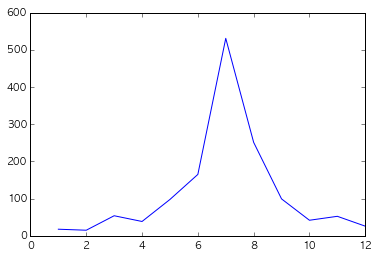

In [129]:
# 1부터 12까지 찍습니다.
plt.plot(range(1,13), data_2008.values)

In [130]:
# DataFrame에 iterrows를 하면 row를 iteration할 수 있습니다.
for index, row in rain_df.iterrows():
    print index
    print '======================'
    print row
    break

0
기간       2008
구분        강수량
계      1356.3
1월       17.7
2월         15
3월       53.9
4월       38.5
5월       97.7
6월        165
7월      530.8
8월      251.2
9월       99.2
10월      41.8
11월      52.4
12월      25.9
Name: 0, dtype: object


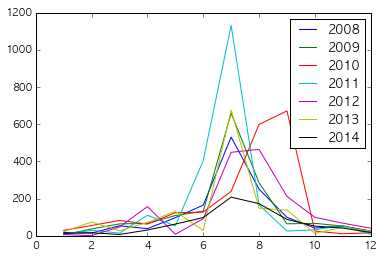

In [131]:
# for문을 돌면서 여러개를 모두 찍어봅시다.
for index, row in rain_df.iterrows():
    label = str(int(row[0]))
    plt.plot(range(1,13), row[3:].values, label=label)
plt.legend()

In [132]:
def get_hg(text):
    return text.decode('utf-8')

In [133]:
# "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
#     print tableau20[i]

In [134]:
# 한글을 사용하기 위해
matplotlib.rc('font', family='AppleGothic')

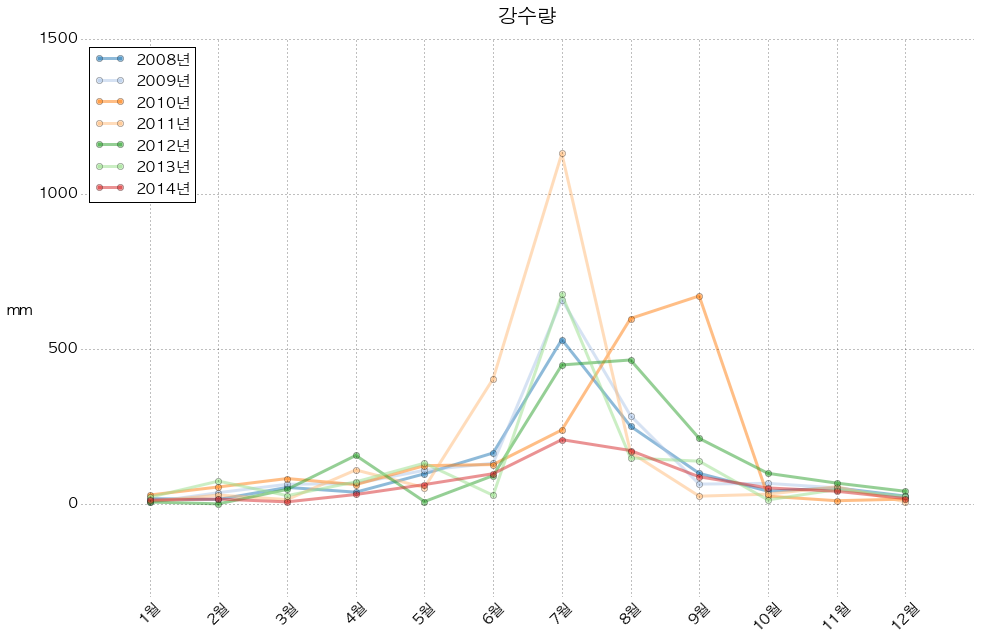

In [135]:
# figure size => (w,h) in inch
plt.figure(figsize=(16,10))

# 색깔 및 다른 속성들도 조금 더 바꿔보죠.
for index, row in rain_df.iterrows():
    label = str(int(row[0])) + '년'
    plt.plot(range(1,13), row[3:].values, 'o-', label=label.decode('utf-8'), \
             linewidth=3, color=tableau20[index], alpha=0.5)
    
plt.title(get_hg('강수량'), fontsize=20, y=1.02)
plt.xticks(range(1,13), data_2008.index, rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('mm', rotation=0, fontsize=15, labelpad=20)
plt.legend(loc='upper left', fontsize=15)

# X,Y축 범위를 조절합니다.
plt.xlim([1,12])
plt.ylim([0,1200])

# x tick을 정합니다.
# plt.xticks(x)

# margin을 정해줍니다.
plot_x_margin = 1
plot_y_margin = 300
xl, xr, yl, yr = plt.axis()
plt.axis((xl - plot_x_margin,
          xr + plot_x_margin,
          yl - plot_y_margin,
          yr + plot_y_margin))

# spine 지우기
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# grid 보여주기
plt.grid()

# tick 지우기
plt.tick_params(bottom="off", top="off", left="off", right="off",
                labelbottom="on", labelleft="on")

plt.savefig('rainfall.png')

### 참고
- [matplotlib pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
- [matplotlib.pyplot.plot documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
- [An introduction to seaborn](http://stanford.edu/~mwaskom/software/seaborn/introduction.html#introduction)
- [Seaborn Example 보기](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html#example-gallery)
- [how-to-make-beautiful-data-visualizations-in-python-with-matplotlib](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)
